Hola **Carmen**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto final 4: Telecomunicaciones

Objetivo: Identificar operadores ineficaces

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

El dataset `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela


## Descarga de datos

### Importar librerias

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

### Leer archivos

In [3]:
clients = pd.read_csv('/datasets/telecom_clients_us.csv') 
dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')

## Análisis exploratorio

### Explorar y preprocesar _clients_

In [4]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
clients['date_start']=pd.to_datetime(clients['date_start'])

In [6]:
#De entero a object
clients['user_id'] = clients['user_id'].astype('str')

In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


### Explorar y preprocesar _dataset_

In [8]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [9]:
#Convertir a formato fecha
dataset['date'] = pd.to_datetime(dataset['date'])

In [10]:
#De float a object
dataset['operator_id'] = dataset['operator_id'].astype('str')

In [11]:
#De entero a objet
dataset['user_id'] = dataset['user_id'].astype('str')

In [12]:
# Contar NaN por columna
dataset.isnull().sum()

user_id                  0
date                     0
direction                0
internal               117
operator_id              0
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

In [13]:
# Porcentaje de valores faltantes
(dataset.isnull().sum() / len(dataset)) * 100

user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.217061
operator_id            0.000000
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  object                               
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          53902 non-null  object                               
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

### Data wrangling

Crear columna para total de llamadas entrantes perdidas (internas y externas) por operador

In [15]:
#Todos los true convertirlos a 1 para despues sumarlos
dataset['cnt_missed_true'] = dataset['is_missed_call'].map({True: 1, False: 0})

Crear columna para tiempo de espera en llamadas entrantes por operador

In [16]:
dataset['waiting_calls'] = dataset['total_call_duration'] - dataset['call_duration']

Crear columna de llamadas salientes y entrantes

In [17]:
# Columna para contar llamadas entrantes (in) entrantes
dataset['cnt_direction_in'] = np.where(dataset['direction'] == 'in', 1, 0)

In [18]:
# Columna para contar llamadas salientes (out) salientes
dataset['cnt_direction_out'] = np.where(dataset['direction'] == 'out', 1, 0)

## Análisis Estadísticos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el análisis inicial y el tratamiento de los dataset previo a su exploración, siempre hay que buscar tener la mejor calidad posible en tus datos
</div>

### Estadística descriptiva

Calcular llamadas promedio por operador

In [19]:
promedio_llamadas_por_operador = dataset.groupby('operator_id')['calls_count'].mean()
promedio_llamadas_por_operador.describe()

count    1093.000000
mean       11.805847
std        25.990752
min         1.000000
25%         1.600000
50%         3.000000
75%         9.589744
max       351.028571
Name: calls_count, dtype: float64

Observamos 1093 operadores, con un promedio de 12 llamadas por operador, siendo 1 llamada como minima y 351 llamadas como máximo. Esta diferencia tan grande entre operadores lo podemos ver tambien reflejada en la desviación estandar elevada con respecto a la media (std 25.99).

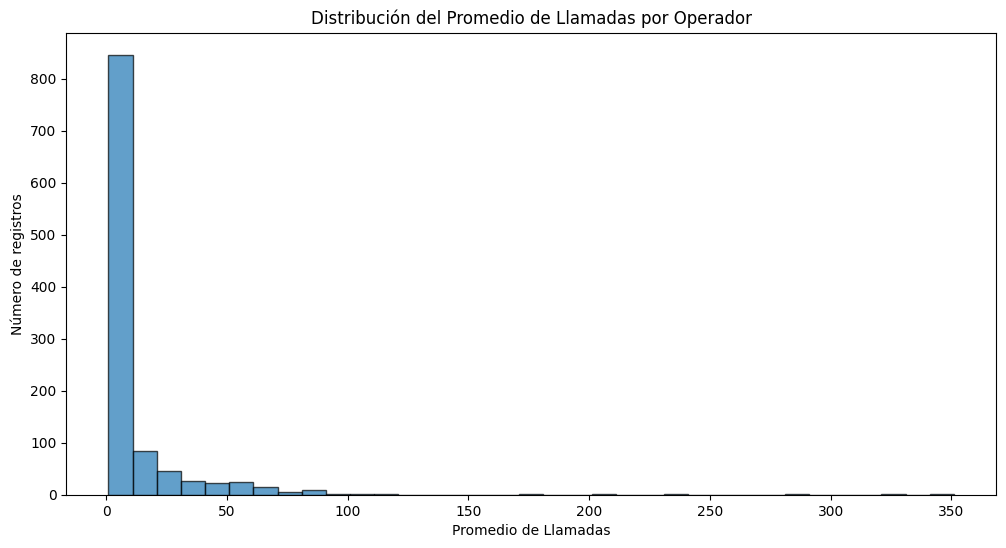

In [20]:
# Histograma básico
plt.figure(figsize=(12, 6))
plt.hist(promedio_llamadas_por_operador, bins=35, alpha=0.7, edgecolor='black')
plt.xlabel('Promedio de Llamadas')
plt.ylabel('Número de registros')
plt.title('Distribución del Promedio de Llamadas por Operador')
plt.show()

Distribucion del número promedio de llamadas por operador. El pico concentra valores bajos, una gran cantidad de operadores tienen un promedio de llamadas bajo, ya que el percentil 75 tiene un promedio de 9.58%.

Calcular el promedio de llamadas perdidas por operador

In [21]:
# Calcular el promedio de llamadas perdidas por operador
promedio_perdidas = dataset.groupby('operator_id')['cnt_missed_true'].mean()

print("Promedio de llamadas perdidas por operador:")
print(promedio_perdidas)

Promedio de llamadas perdidas por operador:
operator_id
879896.0    0.390625
879898.0    0.398406
880020.0    0.318182
880022.0    0.434211
880026.0    0.474747
              ...   
972412.0    0.400000
972460.0    0.333333
973120.0    0.500000
973286.0    0.000000
nan         0.985071
Name: cnt_missed_true, Length: 1093, dtype: float64


In [22]:
print("Estadísticas del promedio de llamadas perdidas:")
print('')
print(promedio_perdidas.describe())

Estadísticas del promedio de llamadas perdidas:

count    1093.000000
mean        0.314918
std         0.232146
min         0.000000
25%         0.125000
50%         0.333333
75%         0.461538
max         1.000000
Name: cnt_missed_true, dtype: float64


Tenemos 1093 operadores telefonicos, el promedio de llamadas perdidas por operador es de 0.3149, esto es que se pierden el 31% de las llamadas.
La desviación estandar es solo un poco menor a la media, por lo que la variación es moderada-alta, esto nos puede indicar que unos operadores tienen muchas llamadas perdidas y otros muy pocas y se observa en el mínimo 0 y  máximo 1, esto es que hay operadores que perdieron todas sus llamadas y otros que nínguna.
Parece que hay una gran variación en el desempeño de los operadores. Algunos son muy eficientes (0% de llamadas perdidas) mientras que otros tienen hasta 100% de llamadas perdidas.

In [23]:
# Análisis más detallado de las llamadas perdidas por operador telefonico
resultado_completo = dataset.groupby('operator_id').agg({
    'cnt_missed_true': ['mean', 'sum', 'count'],
    'cnt_direction_in': 'sum',
    'cnt_direction_out': 'sum'
}).round(3)

# Aplanar los nombres de columnas pora mejor manejo futuro
resultado_completo.columns = ['_'.join(col).strip() for col in resultado_completo.columns]
print(resultado_completo)

             cnt_missed_true_mean  cnt_missed_true_sum  cnt_missed_true_count  \
operator_id                                                                     
879896.0                    0.391                   50                    128   
879898.0                    0.398                  100                    251   
880020.0                    0.318                    7                     22   
880022.0                    0.434                   33                     76   
880026.0                    0.475                   94                    198   
...                           ...                  ...                    ...   
972412.0                    0.400                    2                      5   
972460.0                    0.333                    3                      9   
973120.0                    0.500                    1                      2   
973286.0                    0.000                    0                      1   
nan                         

In [24]:
# presento un nan como operador, corroborarlo
dataset['operator_id'].isnull().sum()

0

In [25]:
# Verificar qué tipos de datos únicos hay en operator_id
print("Valores únicos en operator_id:")
print(dataset['operator_id'].unique())
print(f"\nTipo de datos: {dataset['operator_id'].dtype}")

Valores únicos en operator_id:
['nan' '880022.0' '880020.0' ... '952916.0' '959118.0' '957922.0']

Tipo de datos: object


Tenemos un operador 'nan', esto es debido a que inicialmente la columna operator_id eran tipo entero y fue transformado a tipo string. Todas las llamadas perdidas que tiene 'nan' no fueron asignadas a ningun operador.

In [26]:
# Calcular el porcentaje de llamadas perdidas
total_llamadas = resultado_completo['cnt_missed_true_count'].sum()
llamadas_perdidas = resultado_completo.loc['nan', 'cnt_missed_true_count']
porcentaje_perdidas = (llamadas_perdidas / total_llamadas) * 100

print(f"Porcentaje de llamadas perdidas: {porcentaje_perdidas:.2f}%")

Porcentaje de llamadas perdidas: 15.16%


In [27]:
#Pasos para hacer grafica de llamadas perdidas de nan vs operadores
# Calcular los valores
total_llamadas_perdidas = resultado_completo['cnt_missed_true_count'].sum()
llamadas_perdidas_nan = resultado_completo.loc['nan', 'cnt_missed_true_count']
llamadas_perdidas_operadores = total_llamadas_perdidas - llamadas_perdidas_nan

# Calcular porcentajes
porcentaje_nan = (llamadas_perdidas_nan / total_llamadas_perdidas) * 100
porcentaje_operadores = (llamadas_perdidas_operadores / total_llamadas_perdidas) * 100

print(f"NaN: {porcentaje_nan:.2f}%")
print(f"Operadores: {porcentaje_operadores:.2f}%")

NaN: 15.16%
Operadores: 84.84%


El 15.16% significa que de todas las llamadas que fueron marcadas como perdidas (cnt_missed_true_count), el 15.16% corresponden a llamadas que nunca fueron asignadas a ningún operador (el grupo "nan"). El 84.84% restante de las llamadas si fueron asignadas a un operador pero aún así se perdieron.

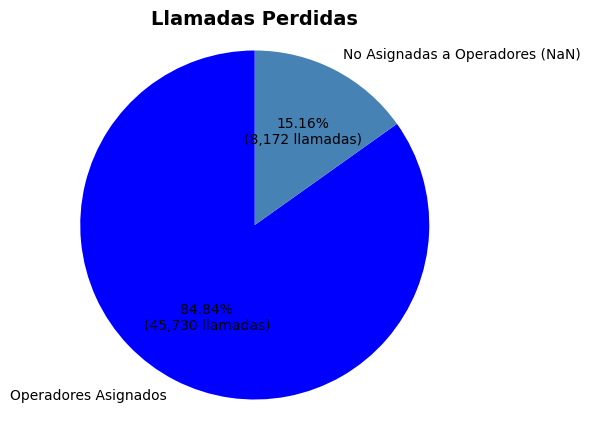

In [28]:
# Datos para la gráfica
etiquetas = ['Operadores Asignados', 'No Asignadas a Operadores (NaN)']
valores = [llamadas_perdidas_operadores, llamadas_perdidas_nan]
porcentajes = [porcentaje_operadores, porcentaje_nan]
colores = ['blue', 'steelblue'] 

# Crear etiquetas personalizadas con valores absolutos y porcentajes
def crear_etiqueta(pct, valores):
    absoluto = int(pct/100.*sum(valores))
    return f'{pct:.2f}%\n({absoluto:,} llamadas)'

# Crear la gráfica circular
plt.figure(figsize=(6, 5))
plt.pie(valores, labels=etiquetas, autopct=lambda pct: crear_etiqueta(pct, valores),
        colors=colores, startangle=90)

plt.title('Llamadas Perdidas', 
          fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

Explorar como se registran las llamadas perdidas por dia de la semana

In [29]:
dataset['day'] = dataset['date'].dt.weekday

In [30]:
call_missed_days = dataset.groupby('day').agg({'cnt_missed_true': 'count'})
call_missed_days

,cnt_missed_true
day,
0,8949
1,9932
2,9985
3,10158
4,9173
5,3238
6,2467


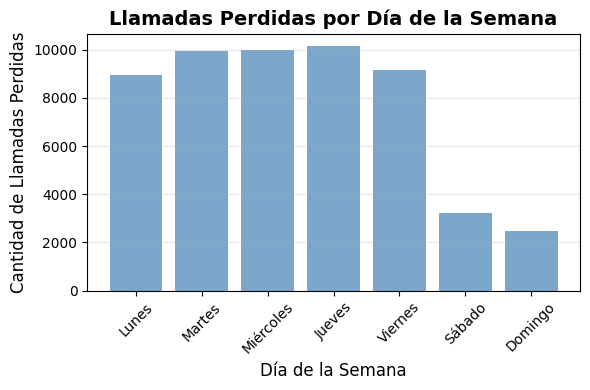

In [31]:
# Crear un mapeo de números a nombres de días
dias_nombres = {
    0: 'Lunes',
    1: 'Martes', 
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Convertir los índices numéricos a nombres de días
call_missed_days_nombres = call_missed_days.copy()
call_missed_days_nombres.index = call_missed_days_nombres.index.map(dias_nombres)

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
plt.bar(call_missed_days_nombres.index, call_missed_days_nombres['cnt_missed_true'], 
        color='steelblue', alpha=0.7)

plt.title('Llamadas Perdidas por Día de la Semana', fontsize=14, fontweight='bold')
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad de Llamadas Perdidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Se pierden mas llamadas entre semana que el fin de semana.

Calcular el promedio de tiempo de espera en llamadas entrantes de cada operador

In [32]:
# Calcular el promedio de tiempo de espera por operador
promedio_tiempoespera = dataset.groupby('operator_id')['waiting_calls'].mean()
promedio_tiempoespera

operator_id
879896.0    110.671875
879898.0    450.087649
880020.0     15.181818
880022.0     57.565789
880026.0    121.171717
               ...    
972412.0    210.000000
972460.0     89.000000
973120.0     10.000000
973286.0     88.000000
nan         167.742291
Name: waiting_calls, Length: 1093, dtype: float64

In [33]:
promedio_tiempoespera.describe()

count    1093.000000
mean      215.402544
std       504.686399
min         0.000000
25%        23.058824
50%        46.285714
75%       157.400000
max      5907.443038
Name: waiting_calls, dtype: float64

De los 1093 operadores, el promedio de tiempo de espera es de 215 min y una desviacion estandar de 504, un minimo de 0 y un máximo de 5907, esto nos indica una diferencia enorme entre operadores y a su vez que hay valores totalmente extremos. 

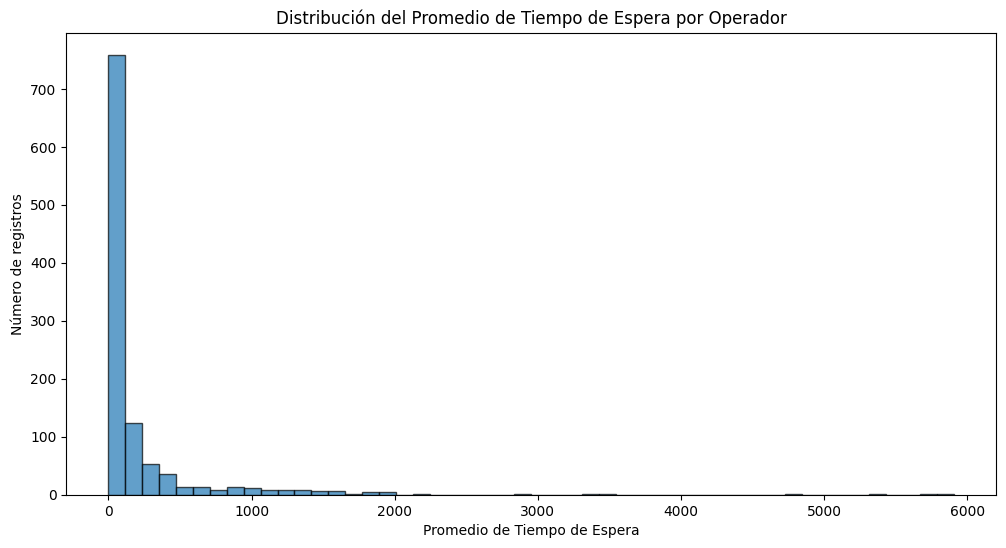

In [34]:
# Histograma básico
plt.figure(figsize=(12, 6))
plt.hist(promedio_tiempoespera, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Promedio de Tiempo de Espera')
plt.ylabel('Número de registros')
plt.title('Distribución del Promedio de Tiempo de Espera por Operador')
plt.show()

Se obtuvieron poco mas de 700 registros de llamadas con tiempo de espera 0 y de ahi fue aumentando el tiempo, comparado con los 53903 registros que hay, es un porcentaje muy pequeño de tiempo 0 de espera.

In [35]:
# Verificar cuántos operadores únicos tienes
operadores_unicos = dataset['operator_id'].nunique()
print(f"Operadores únicos: {operadores_unicos}")

# Verificar cuántos registros totales tienes
print(f"Total de registros: {len(dataset)}")

# Ver cuántos registros por operador
registros_por_operador = dataset['operator_id'].value_counts()
print(f"Registros por operador (primeros 10):")
print(registros_por_operador.head(10))

Operadores únicos: 1093
Total de registros: 53902
Registros por operador (primeros 10):
nan         8172
901884.0     348
901880.0     337
893804.0     325
885876.0     319
891410.0     290
887276.0     289
891414.0     277
885890.0     277
905538.0     269
Name: operator_id, dtype: int64


In [36]:
# Contar operadores únicos con waiting_calls = 0
operadores_unicos_cero = dataset[dataset['waiting_calls'] == 0]['operator_id'].nunique()
print(f"Operadores únicos con tiempo 0: {operadores_unicos_cero}")
print(f"Porcentaje del total: {operadores_unicos_cero/dataset['operator_id'].nunique()*100:.1f}%")

Operadores únicos con tiempo 0: 341
Porcentaje del total: 31.2%


In [37]:
# Operadores problemáticos (por encima del percentil 50)
percentil_50 = promedio_tiempoespera.quantile(0.50)
operadores_problematicos = promedio_tiempoespera[promedio_tiempoespera > percentil_50]

print(f"Operadores con tiempos muy altos (>percentil 50): {len(operadores_problematicos)}")
print(f"Umbral: {percentil_50:.2f}")

Operadores con tiempos muy altos (>percentil 50): 546
Umbral: 46.29


Tenemos 546 operadores donde su tiempo de espera supera los 46.29 minutos.

Calcular el promedio de llamadas salientes externas por operador



In [38]:
promedio_call_out = dataset.groupby('operator_id')['cnt_direction_out'].mean()
promedio_call_out

operator_id
879896.0    0.820312
879898.0    0.745020
880020.0    0.636364
880022.0    0.894737
880026.0    0.904040
              ...   
972412.0    0.800000
972460.0    0.777778
973120.0    1.000000
973286.0    0.000000
nan         0.024474
Name: cnt_direction_out, Length: 1093, dtype: float64

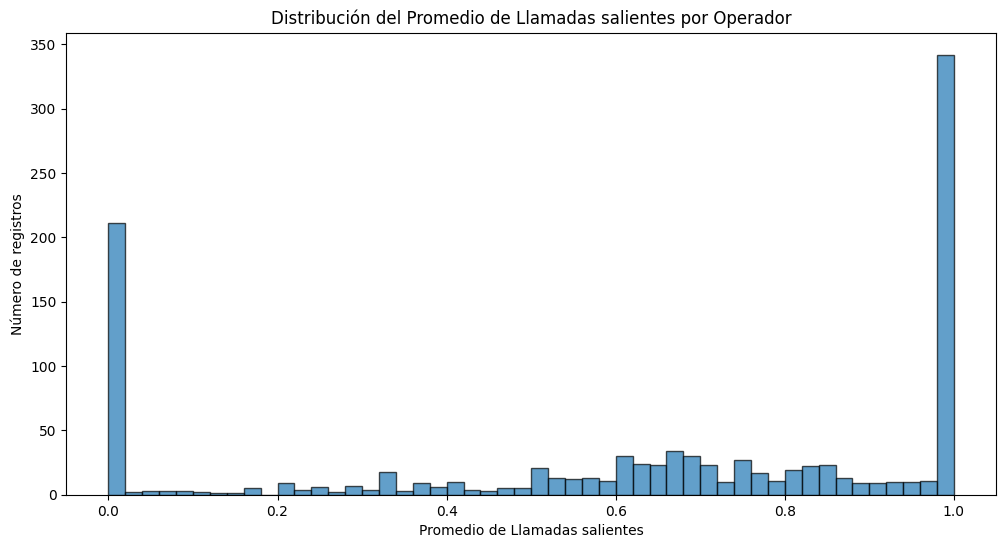

In [39]:
# Histograma básico
plt.figure(figsize=(12, 6))
plt.hist(promedio_call_out, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Promedio de Llamadas salientes')
plt.ylabel('Número de registros')
plt.title('Distribución del Promedio de Llamadas salientes por Operador')
plt.show()

Podemos ver dos picos, uno para operadores que hacen llamadas y otros para operadores que no hacen llamadas, y los operadores de enmediohacen llamadas ocasionales. Se puede tratar de que los operadores tienen diferentes roles dentro de la empresa.

In [40]:
print(promedio_call_out.describe())
# Verificar cuántos registros totales tienes
print(f"Total de registros: {len(dataset)}")

count    1093.000000
mean        0.623809
std         0.375996
min         0.000000
25%         0.333333
50%         0.709677
75%         1.000000
max         1.000000
Name: cnt_direction_out, dtype: float64
Total de registros: 53902


Tenemos 1093 operadores telefonicos y cada unos hace un promedio de 0.62 llamada por registro (53902 registros totales). tenemos operadores que siempre hacen llamadas (max 1) y operadores que nunca hacen llamadas (min 0). el 50% de los operadores hacen en promedio 0.71 llamadas.

In [41]:
operadores_sin_llamadas = (promedio_call_out == 0.0).sum()
print(f"Operadores que nunca hacen llamadas: {operadores_sin_llamadas}")

Operadores que nunca hacen llamadas: 210


In [42]:
operadores_siempre_llaman = (promedio_call_out == 1.0).sum()
print(f"Operadores que siempre hacen llamadas salientes: {operadores_siempre_llaman}")

Operadores que siempre hacen llamadas salientes: 338


In [43]:
# Filtrar y crear dos grupos para operadores
grupo_con_operador = dataset[dataset['operator_id'] != 'nan']
grupo_sin_operador = dataset[dataset['operator_id'] == 'nan']

print(f"Registros CON operator_id: {len(grupo_con_operador)}")
print(f"Registros SIN operator_id: {len(grupo_sin_operador)}")
print(f"Porcentaje con ID: {len(grupo_con_operador)/len(dataset)*100:.1f}%")
print(f"Porcentaje sin ID: {len(grupo_sin_operador)/len(dataset)*100:.1f}%")

Registros CON operator_id: 45730
Registros SIN operator_id: 8172
Porcentaje con ID: 84.8%
Porcentaje sin ID: 15.2%


In [44]:
# Segundo filtro: Solo llamadas salientes (direction = 'out')
llamadas_salientes = grupo_con_operador[grupo_con_operador['direction'] == 'out']

print(f"Total registros con operador: {len(grupo_con_operador)}")
print(f"Registros de llamadas salientes: {len(llamadas_salientes)}")
print(f"Porcentaje de llamadas salientes: {len(llamadas_salientes)/len(grupo_con_operador)*100:.1f}%")

Total registros con operador: 45730
Registros de llamadas salientes: 31717
Porcentaje de llamadas salientes: 69.4%


In [45]:
# Ver cuántos operadores únicos hay en cada grupo
operadores_totales = grupo_con_operador['operator_id'].nunique()
operadores_con_salientes = llamadas_salientes['operator_id'].nunique()

print(f"Operadores únicos totales: {operadores_totales}")
print(f"Operadores que hacen llamadas salientes: {operadores_con_salientes}")

Operadores únicos totales: 1092
Operadores que hacen llamadas salientes: 882


Al parecer estos 210 operadores que no hacen llamadas podrían estar enfocados en solo recibir.

In [46]:
# Verificar operadores que SOLO reciben llamadas entrantes
llamadas_entrantes = grupo_con_operador[grupo_con_operador['direction'] == 'in']
operadores_solo_entrantes = llamadas_entrantes['operator_id'].nunique()

print(f"Operadores que reciben llamadas entrantes: {operadores_solo_entrantes}")

# Ver si hay operadores que hacen AMBOS tipos de llamadas
operadores_mixtos = len(set(grupo_con_operador['operator_id']) & 
                         set(llamadas_salientes['operator_id']) & 
                         set(llamadas_entrantes['operator_id']))
print(f"Operadores que hacen ambos tipos: {operadores_mixtos}")

Operadores que reciben llamadas entrantes: 754
Operadores que hacen ambos tipos: 544


NOTA: Me enfocare en los 544 operadores que hacen y reciben llamadas para eliminar a los que posiblemente se dedican a atencion al cliente y a cobranza/ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho el análisis de cada gráfica, esto deja un proceso de análisis súper claro y se comunica muy bien el mensaje a transmitir con las gráficas.
</div>

### Prueba de hipótesis

H0: No hay diferencia significativa en el promedio de llamadas perdidas entre operadores mixtos que están por encima vs por debajo de la media general.

H1: Sí hay diferencia significativa en el promedio de llamadas perdidas entre estos dos grupos.

In [47]:
# Obtener IDs de operadores mixtos
ids_mixtos = set(llamadas_entrantes['operator_id']) & set(llamadas_salientes['operator_id'])

# Crear DataFrame de operadores mixtos
df_ops_mixtos = grupo_con_operador[grupo_con_operador['operator_id'].isin(ids_mixtos)]

# Calcular estadísticas
df_ops_mixtos['cnt_missed_true'].mean()

0.3299951218112428

In [48]:
df_ops_mixtos['cnt_missed_true'].describe()

count    34849.000000
mean         0.329995
std          0.470218
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cnt_missed_true, dtype: float64

El promedio de llamadas perdidas es del 32.99%, será nuestro valor de referencia.

In [49]:
# Calcular el porcentaje de llamadas perdidas por operador
operadores_stats = df_ops_mixtos.groupby('operator_id').agg({
    'cnt_missed_true': 'mean'  # Promedio de llamadas perdidas por operador
}).reset_index()

# Ver los primeros resultados
print(operadores_stats.head())
print(f"Total de operadores: {len(operadores_stats)}")

  operator_id  cnt_missed_true
0    879896.0         0.390625
1    879898.0         0.398406
2    880020.0         0.318182
3    880022.0         0.434211
4    880026.0         0.474747
Total de operadores: 544


In [50]:
# Separar operadores en dos grupos
grupo_alto = operadores_stats[operadores_stats['cnt_missed_true'] > 0.32]
grupo_bajo = operadores_stats[operadores_stats['cnt_missed_true'] <= 0.32]

print(f"Operadores con >32% llamadas perdidas: {len(grupo_alto)}")
print(f"Operadores con ≤32% llamadas perdidas: {len(grupo_bajo)}")

Operadores con >32% llamadas perdidas: 288
Operadores con ≤32% llamadas perdidas: 256


H0: No hay diferencia significativa en las llamadas perdidas entre operadores mixtos que están por encima del 32% vs los operadores que estan por debajo del 32%.

H1: Sí hay diferencia significativa en las llamadas perdidas entre operadores mixtos que están por encima del 32% vs los operadores que estan por debajo del 32%.

In [51]:
# Los valores de llamadas perdidas para cada grupo
valores_grupo_alto = grupo_alto['cnt_missed_true']
valores_grupo_bajo = grupo_bajo['cnt_missed_true']
alpha = 0.05

# Ejecutar la prueba de dos colas
statistic, p_value = mannwhitneyu(valores_grupo_alto, valores_grupo_bajo, alternative='two-sided')

print(f"Estadístico U: {statistic}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Rechazamos hipótesis nula")
else:
    print("No podemos rechazar hipótesis nula")

Estadístico U: 73728.0
Valor p: 2.7849075827387667e-90
Rechazamos hipótesis nula


In [52]:
print(f"\nEstadísticas descriptivas:")
print(f"Grupo alto (>32%) - Mediana: {valores_grupo_alto.median():.4f}")
print(f"Grupo bajo (≤32%) - Mediana: {valores_grupo_bajo.median():.4f}")


Estadísticas descriptivas:
Grupo alto (>32%) - Mediana: 0.3867
Grupo bajo (≤32%) - Mediana: 0.2324


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre se debe realizar pruebas estadísticas para determinar si las diferencias observadas son significativas y no se está sesgando el análisis
</div>

## Conclusión

Se decidio trabajar la variable de llamadas perdidas, ya que puede reflejar tambien el problema del alto porcentaje de tiempo de espera (el promedio de tiempo de espera es de 215 min y una desviacion estandar de 504, un minimo de 0 y un máximo de 5907, esto nos indica una diferencia enorme entre operadores y a su vez que hay valores totalmente extremos.), ya que clientes que no esperaron, se finaliza como llamada perdida. Tambien se hizo un filtrado de operadores, se filtraron las llamadas que no fueron asignadas a ningun operador, a los operadores que solo reciben y a los que solo hacen llamadas por la probabilidad de que tienen un rol específico como cobranza/ ventas / atencion al cliente. Se limito a analizar a 544 operadores que reciben y hacen llamadas, nombrados operadores mixtos. El promedio de llamadas perdidas entre estos operadores es del 32%.

El planteamiento fue que, sí había diferencias significativa en las llamadas perdidas entre operadores mixtos que están por encima del 32% vs los operadores que estan por debajo del 32% y el resultado fue que si hay una diferencia estadísticamente significativa Estadístico U: 73728.0, Valor p: 2.7849075827387667e-90 (muy pequeño). 

Posteriormente se comparo la media vs la mediana para explicarlo con estadística descriptiva y se observo que los operadores mixtos que superan el umbral del 32% de llamadas perdidas tienen una mediana de 38.67%, mientras que los que están por debajo tienen una mediana de 23.24%. Esta diferencia de 15.43 puntos porcentuales es estadísticamente significativa.

Conclusión: Los dos grupos de operadores tienen comportamientos claramente diferentes en cuanto a llamadas perdidas, confirmando que el umbral del 32% efectivamente separa operadores con diferentes niveles de desempeño.

### Fuentes

https://vertical-iberica.com/metricas-para-analizar-llamadas-y-mejorar-la-atencion-al-cliente-en-call-center/?srsltid=AfmBOorRVKDuSSAMYu7v0fkj_gJUTXVZ2Pl8r_1jskkDkFsioKEax76M

https://driv.in/blog/escala-de-satisfaccion-cliente-kpi?utm_term=&utm_campaign=S-BLOG&utm_source=adwords&utm_medium=ppc&hsa_acc=8759955348&hsa_cam=20984547581&hsa_grp=158914013432&hsa_ad=689430318160&hsa_src=g&hsa_tgt=dsa-2059257533185&hsa_kw=&hsa_mt=&hsa_net=adwords&hsa_ver=3&gad_source=1&gad_campaignid=20984547581&gbraid=0AAAAADKmmJkv8zc-gVoqUeSEIlC7qhmzm&gclid=CjwKCAjwz5nGBhBBEiwA-W6XRG9f-TKZyC9SSPocpO1nBwiHWAsM4grETjtsDQQfQDPXDY_M4aJsWxoCUHEQAvD_BwE

https://www.zendesk.com.mx/blog/que-es-call-center/

https://www.salesforce.com/mx/blog/que-es-un-call-center/

## PRESENTACION PDF

https://drive.google.com/file/d/17y0yY_ydVXjz4lvT73OYMd2Wrj9qQ9Gc/view?usp=sharing

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen proyecto Carmen! Lo único por lo que regreso el mismo es porque necesito revisar la presentación realizada sobre el mismo y tu link no está configurado correctamente ya que no puedo acceder.

En la parte de compartir procura siempre dejar la opción de "Cualquiera con link" y para verificarlo puedes abrir el link en una ventana de tu navegador en modo incógnito para comprobar que se puede ver el contenido.

Saludos!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Una disculpa, ya lo cambie a opción "Cualquiera con link", gracias.
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Carmen!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>